## Segmentation and Targeting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

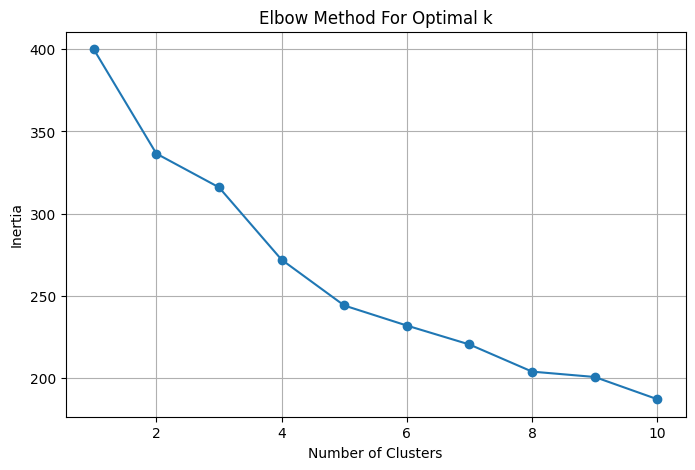

In [2]:
df = pd.read_csv("data/caribbean_ports.csv")

# 选择用于聚类的数值字段
numeric_cols = [
    'avg_annual_visitors', 'avg_port_fee_usd', 'local_attractions_score',
    'avg_customer_satisfaction', 'excursion_variety_index',
    'avg_disembark_rate', 'avg_shore_spend_per_passenger', 'seasonality_score'
]
df_numeric = df[numeric_cols].dropna()

# 标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# 肘部法则选择 k
inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=654)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [3]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# 将聚类结果加入原始数据
df_result = df.loc[df_numeric.index].copy()
df_result['cluster'] = cluster_labels

# 可选：查看每个簇的统计信息
print(df_result['cluster'].value_counts())
print(df_result.groupby('cluster')[numeric_cols].mean())

cluster
3    23
1    19
2     6
0     2
Name: count, dtype: int64
         avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
cluster                                                                   
0               1.064086e+06          0.920000                 4.500000   
1               4.518456e+05         12.426842                 6.421053   
2               3.927072e+05          8.305000                 2.500000   
3               9.668239e+05         10.762174                 3.304348   

         avg_customer_satisfaction  excursion_variety_index  \
cluster                                                       
0                         9.420000                 5.000000   
1                         8.191053                 5.473684   
2                         9.650000                 5.833333   
3                         7.719130                 6.521739   

         avg_disembark_rate  avg_shore_spend_per_passenger  seasonality_score  
cluster                 

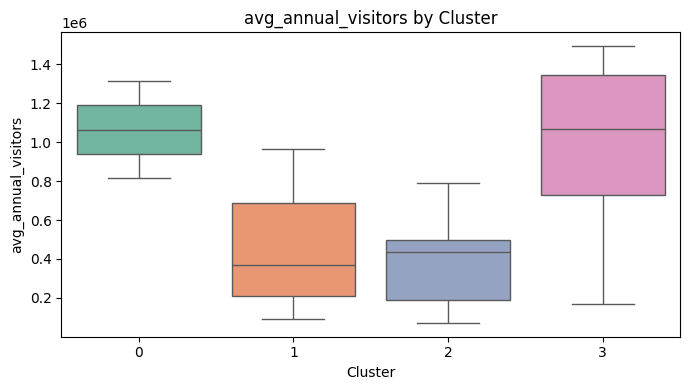

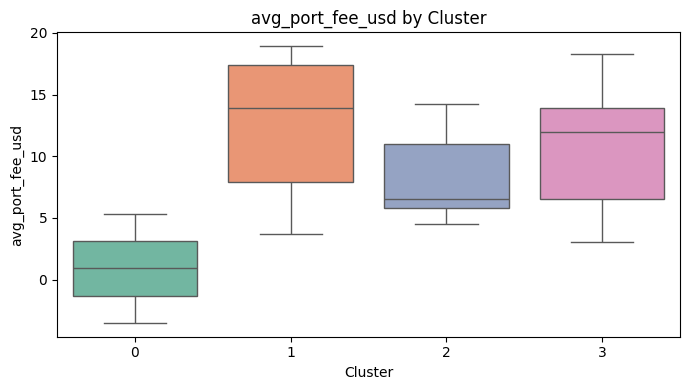

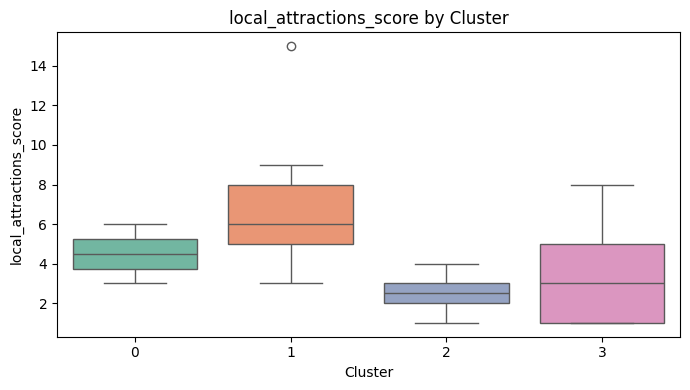

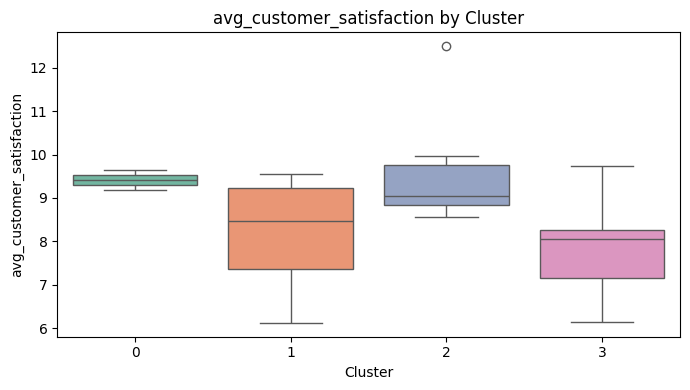

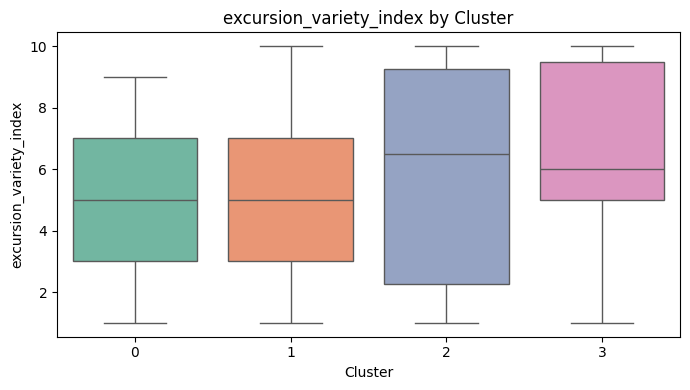

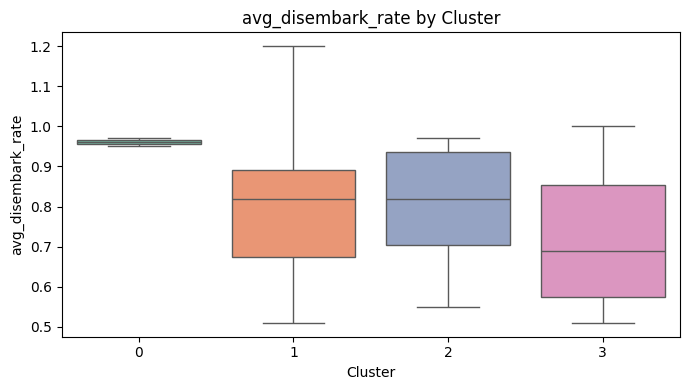

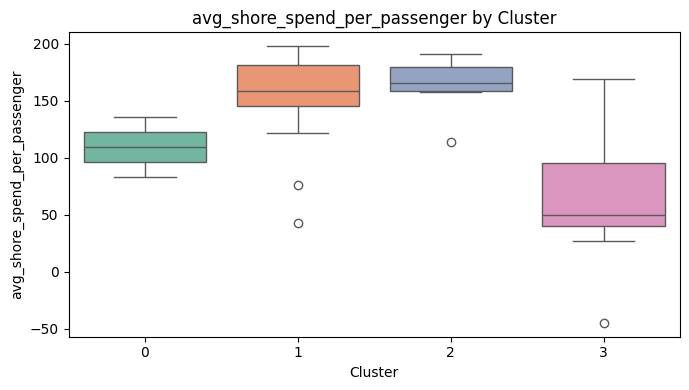

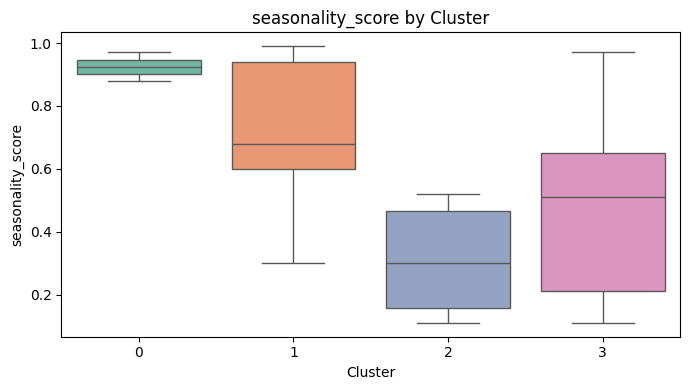

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = 'Set2'

for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df_result, x='cluster', y=col, hue='cluster', palette=palette)
    plt.title(f'{col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.legend().remove() 
    plt.tight_layout()
    plt.show()

Cluster 0: Exclusive Giants

This type of port is the most outstanding and rare entity. Although they are extremely limited in number (only 2), they have the highest average annual visitor traffic (over 1.06 million people), the best customer satisfaction (9.42 points), and an almost perfect landing rate (0.96). Even more surprisingly, they have very low port dues, only $0.92, and they are highly seasonal (0.93), i.e., their reception capacity is highly concentrated during the peak tourist season. This type of port is highly suitable to be the focal point of the "Luxury Line", with an emphasis on a noble and rare immersive experience with full landings. It is tailored especially for the premium clientele and aims to create a brand benchmark.

Cluster 1: Popular Premiums

This type of port is a typical representative of "high popularity and high quality", including 19 ports. Their average annual visitor volume is approximately 450,000 people, and the customer satisfaction rate is also high (8.19). At the same time, they perform well in dimensions such as scenic spot ratings, shore consumption, and port charges. For example, the average tourist consumption reaches $153, and the port fee also reaches $12.42. Overall, this is a "mature" port collection, suitable for most tourists who pursue the richness and convenience of scenic spots. It is suggested that Lobster Land take such ports as the key investment targets for its future main routes, and build brand reputation and increase revenue through mid-to-high-end routes.

Cluster 2: Luxury Niche

Although it is the smallest in number (only six), it also carries the greatest potential for profitability per passenger. Their customer satisfaction rate is as high as 9.65, a record among all clusters, and average onshore consumption per passenger is also the highest ($162.57). Though these ports are fairly low on the scenic spot scale (2.5), maybe because of this reason exactly, they have more expertise in high-end service projects, such as private yachts and customized activities. The volume of visitors was relatively small (390,000), but landing rate and diversity of activities were both high. This cluster is best positioned to develop "private customized cruise" products, which appeal to high-net-worth niche clients and build on the luxurious brand image.

Cluster 3: Crowd Classics

This is the most "base" feature-rich group of ports, consisting of 23 ports, the largest group by number. Their average annual number of tourists is close to 960,000, but they are relatively low in customer satisfaction (7.71) and tourist consumption ($67.04), with typical characteristics of "high traffic and low unit price.". The landscape spot grade and seasonality are not that great, but the high landing rate and abundant activities make it a very cost-effective choice for hot lines. This category is suitable as the entry-level products of Lobster Land, seizing users who take cruise ships for the first time or price-sensitive consumer groups, thereby expanding the overall passenger flow.